# DiscRates class

Discount rates are used to calculate the net present value of any future or past value. They are thus used to compare amounts paid (costs) and received (benefits) in different years. A project is economically viable (attractive), if the net present value of benefits exceeds the net present value of costs - a const-benefit ratio < 1.

There are several important implications that come along with discount rates. Namely, that higher discount rates lead to smaller net present values of future impacts (costs). As a consequence of that, climate action and mitigation measures can be postboned. In the literature higher discount rates are typically justified by the expectation of continued exponential growth of the economy.
The most widley used interest rate in climate change economics is 1.4% as propsed by the Stern Review (2006). Neoliberal economists around Nordhaus (2007) claim that rates should be higher, around 4.3%. Environmental economists argue that future costs shouldn't be discounted at all. This is especially true for non-monetary variables such as ecosystems or human lifes, where no price tag should be applied out of ethical reasons. This discussion has a long history, reaching back to the 18th century: “Some things have a price, or relative worth, while other things have a dignity, or inner worth” (Kant, 1785).



This class contains the discount rates for every year and discounts given values. Its attributes are:

 * tag (Tag): information about the source data
 * years (np.array): years
 * rates (np.array): discount rates for each year (between 0 and 1)

In [1]:
from climada.entity import DiscRates
help(DiscRates)

Help on class DiscRates in module climada.entity.disc_rates.base:

class DiscRates(builtins.object)
 |  DiscRates(years=None, rates=None, tag=None)
 |  
 |  Defines discount rates and basic methods. Loads from
 |  files with format defined in FILE_EXT.
 |  
 |  Attributes
 |  ---------
 |  tag: Tag
 |      information about the source data
 |  years: np.array
 |      list of years
 |  rates: np.array
 |      list of discount rates for each year (between 0 and 1)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, years=None, rates=None, tag=None)
 |      Fill discount rates with values and check consistency data
 |      
 |      Parameters
 |      ----------
 |      years : numpy.ndarray(int)
 |          Array of years. Default is numpy.array([]).
 |      rates : numpy.ndarray(float)
 |          Discount rates for each year in years.
 |          Default is numpy.array([]).
 |          Note: rates given in float, e.g., to set 1% rate use 0.01
 |      tag : climate.entity.tag
 |      

An example of use - we define discount rates and apply them on a coastal protection scheme which initially costs 100 mn. USD plus 75'000 USD mainteance each year, starting after 10 years. Net present value of the project can be calculated as displayed:

net present value: 1.01231e+08


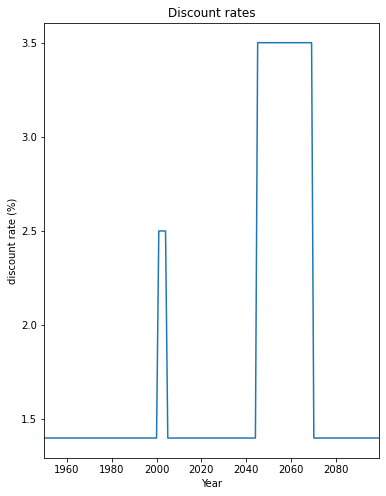

In [3]:
%matplotlib inline
import numpy as np
from climada.entity import DiscRates

# define discount rates
years = np.arange(1950, 2100)
rates = np.ones(years.size) * 0.014
rates[51:55] = 0.025
rates[95:120] = 0.035
disc = DiscRates(years=years, rates=rates)
disc.plot()

# Compute net present value between present year and future year.
ini_year = 2019
end_year = 2050
val_years = np.zeros(end_year-ini_year+1)
val_years[0] = 100000000 # initial investment
val_years[10:] = 75000 # maintenance from 10th year
npv = disc.net_present_value(ini_year, end_year, val_years)
print('net present value: {:.5e}'.format(npv))

## Read discount rates of an Excel file

Discount rates defined in an excel file following the template provided in sheet `discount` of `climada_python/data/system/entity_template.xlsx` can be ingested directly using the method `from_excel()`.

Read file: /Users/ckropf/climada/data/entity_template.xlsx


<AxesSubplot:title={'center':'Discount rates'}, xlabel='Year', ylabel='discount rate (%)'>

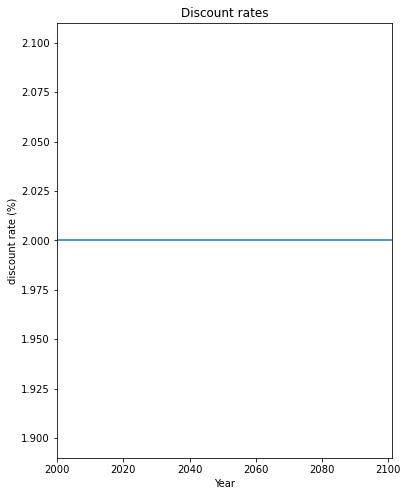

In [4]:
from climada.entity import DiscRates
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
disc = DiscRates.from_excel(file_name)
print('Read file:', disc.tag.file_name)
disc.plot();

## Write discount rates

Users may write the discounts in Excel format using write_excel() method `write_excel()`.

In [5]:
from climada.entity import DiscRates
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
disc = DiscRates.from_excel(file_name)

# write file
disc.write_excel('results/tutorial_disc.xlsx')

Pickle can always be used as well:

In [5]:
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('tutorial_disc.p', disc)